<a href="https://colab.research.google.com/github/Zia-Ul-Hasan/Churn-Prediction-IBM-telco/blob/main/EDA_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_excel('Eda_data.xlsx')
print(df.head())

        State         City  Zip Code   Latitude   Longitude  Gender  \
0  California  Los Angeles     90003  33.964131 -118.272783    Male   
1  California  Los Angeles     90005  34.059281 -118.307420  Female   
2  California  Los Angeles     90006  34.048013 -118.293953  Female   
3  California  Los Angeles     90010  34.062125 -118.315709  Female   
4  California  Los Angeles     90015  34.039224 -118.266293    Male   

  Senior Citizen Partner Dependents  Tenure Months  ... Tech Support  \
0             No      No         No              2  ...           No   
1             No      No        Yes              2  ...           No   
2             No      No        Yes              8  ...           No   
3             No     Yes        Yes             28  ...          Yes   
4             No      No        Yes             49  ...           No   

  Streaming TV Streaming Movies        Contract Paperless Billing  \
0           No               No  Month-to-month               Yes   
1 

Lets take a Look at the total churn count among 7032 customers

Churn Label
No     5163
Yes    1869
Name: count, dtype: int64


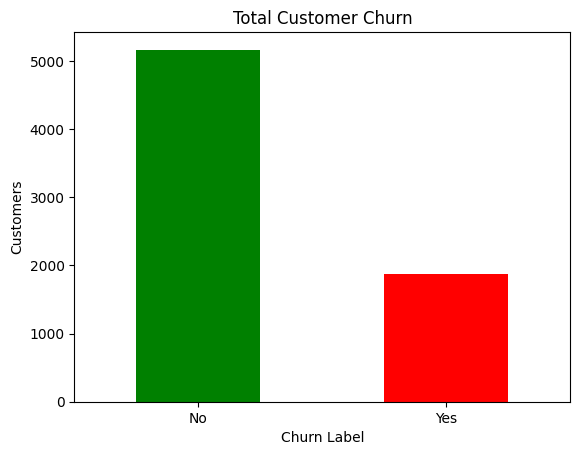

In [3]:
df['Churn Label'].value_counts().plot(kind='bar',color=['green','red'])
plt.title('Total Customer Churn')
plt.xlabel('Churn Label')
plt.xticks(rotation=360)
plt.ylabel('Customers')
print(df['Churn Label'].value_counts())

WHen we analyze the ratio fo churn with respect to gender we can see that the gender of customer doesnt have any particular significannce in causing churn

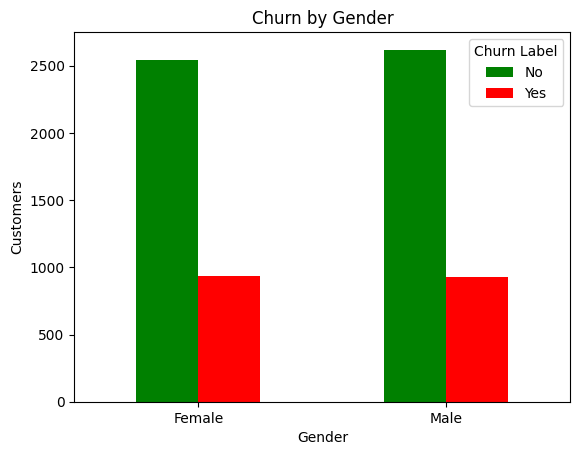

Percentage of Churn by female customers: 26.959517657192077
Percentage of Churn by male customers: 26.204564666103124


In [6]:
churn_by_gender=pd.crosstab(df["Gender"],df["Churn Label"])
female=churn_by_gender.loc['Female','No']
male=churn_by_gender.loc['Male','No']
female_churn=churn_by_gender.loc['Female','Yes']
male_churn=churn_by_gender.loc['Male','Yes']
female_churn=(female_churn/(female_churn+female))*100
male_churn=(male_churn/(male_churn+male))*100

churn_by_gender.plot(kind='bar',stacked=False,color=['green','red'])
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.xticks(rotation=360)
plt.ylabel('Customers')
plt.show()
print(f"Percentage of Churn by female customers: {female_churn}")
print(f"Percentage of Churn by male customers: {male_churn}")

When we compare customer churn to ratio  of senior citizens, we can observe that senior citizens are more inclined towards churning as compared to younger customers

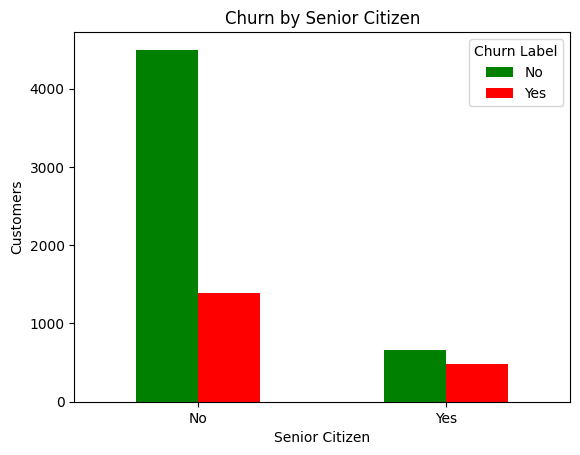

Percentage of Churn by Senior Citizen customers: 41.68126094570928
Percentage of Churn by Non Senior Citizen customers: 23.65025466893039


In [7]:
churn_by_sc=pd.crosstab(df["Senior Citizen"],df["Churn Label"])
sc_churn=churn_by_sc.loc['Yes','Yes']
non_sc_churn=churn_by_sc.loc['No','Yes']
sc=churn_by_sc.loc['Yes','No']
non_sc=churn_by_sc.loc['No','No']
sc_churn=(sc_churn/(sc+sc_churn))*100
non_sc_churn=(non_sc_churn/(non_sc_churn+non_sc))*100
churn_by_sc.plot(kind='bar',stacked=False,color=['green','red'])
plt.title('Churn by Senior Citizen')
plt.xlabel('Senior Citizen')
plt.xticks(rotation=360)
plt.ylabel('Customers')
plt.show()
print(f"Percentage of Churn by Senior Citizen customers: {sc_churn}")
print(f"Percentage of Churn by Non Senior Citizen customers: {non_sc_churn}")

This vizulaization shows us that most of the customers  become churners just after a month which caues low monthky charges and low total charges

 we also see that amost 55%  our customer  play around 50 to 100
 with 20% of customers opting for the basic tier packages
  

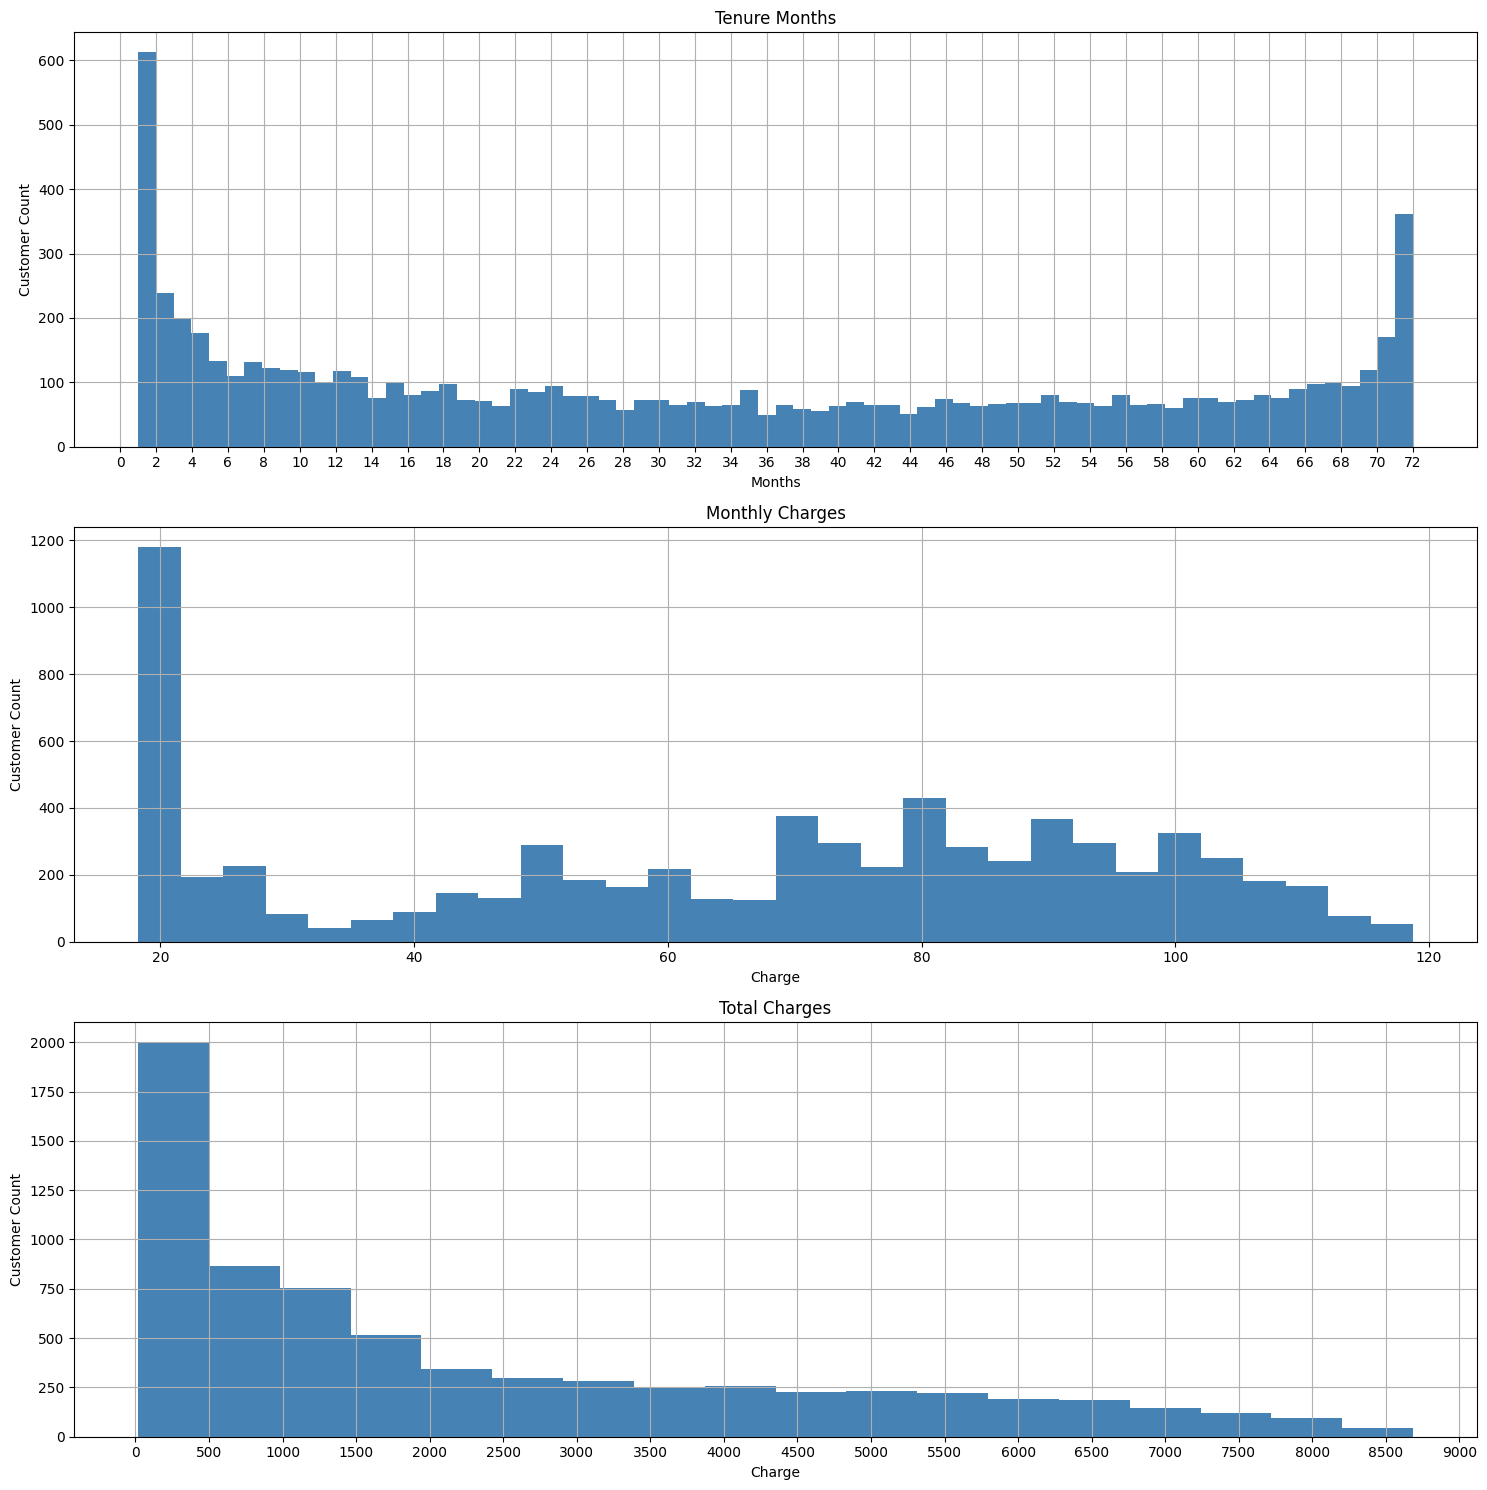

Monthly Charges
(0, 25]       19.937429
(25, 50]      12.670648
(50, 75]      23.037543
(75, 100]     31.527304
(100, 125]    12.827076
Name: proportion, dtype: float64


In [8]:
fig,axes= plt.subplots(3,1, figsize=(30,30))
df['Tenure Months'].hist(bins=72,figsize=(15,15),color='steelblue',ax=axes[0])
axes[0].set_title('Tenure Months')
axes[0].set_xticks(range(0,74,2))
axes[0].set_xlabel('Months')
axes[0].set_ylabel('Customer Count')
df['Monthly Charges'].hist(bins=30,figsize=(15,15),color='steelblue',ax=axes[1])
axes[1].set_title('Monthly Charges')
axes[1].set_xlabel('Charge')
axes[1].set_ylabel('Customer Count')
df['Total Charges'].hist(bins=18,figsize=(15,15),color='steelblue',ax=axes[2])
axes[2].set_title('Total Charges')
axes[2].set_xticks(range(0,9500,500))
axes[2].set_xlabel('Charge')
axes[2].set_ylabel('Customer Count')
plt.tight_layout()
plt.show()
bin_percent_mc=pd.cut(df["Monthly Charges"],bins=range(0,140,25)).value_counts(normalize=True).sort_index()*100
print(bin_percent_mc)


The LOWESS regression line for churned customers rises more sharply than for non-churned customers, especially in the early tenure range. This indicates that customers who experience rapid increases in monthly charges or who start with high plans upfront are more likely to churn, supporting the idea that jump like pricing behavior contributes to early churn.


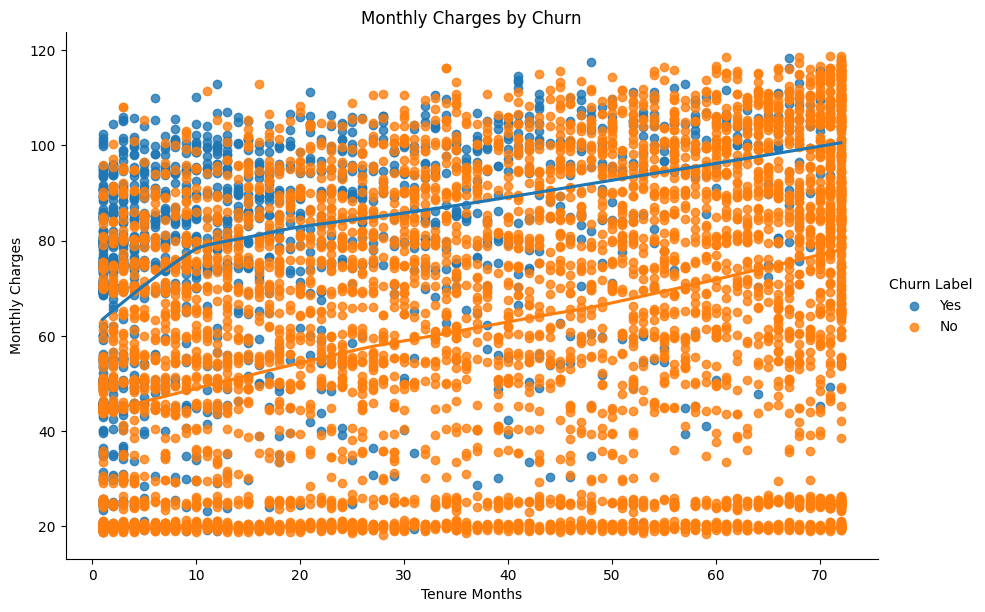

In [9]:
sns.lmplot(data=df,x='Tenure Months', y='Monthly Charges',hue='Churn Label',lowess=True, height=6, aspect=1.5)
plt.title('Monthly Charges by Churn')
plt.show()


when we compare churn rate to contract tyoe we find the  customer with month to month type contract were more likely to churn than other long term plans


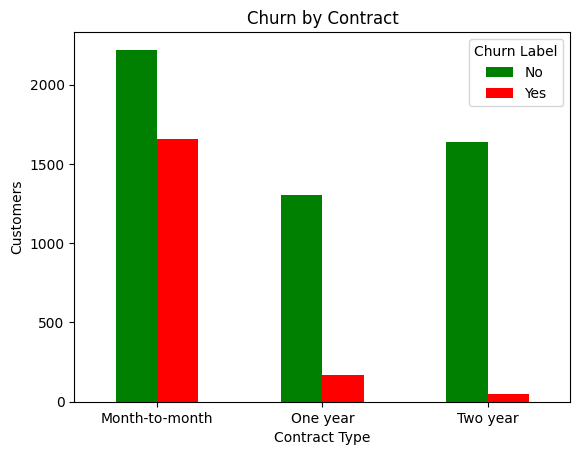

Churn Label       No   Yes
Contract                  
Month-to-month  2220  1655
One year        1306   166
Two year        1637    48
Percentage of Churn by Month to Month customers: 42.70967741935484
Percentage of Churn by One Year customers: 11.277173913043478
Percentage of Churn by Two Year customers: 2.8486646884272995


In [10]:
churn_by_contract= pd.crosstab(df['Contract'],df['Churn Label'])
churn_by_contract.plot(kind='bar',stacked=False,color=['green','red'])
plt.title('Churn by Contract')
plt.xlabel('Contract Type')
plt.xticks(rotation=360)
plt.ylabel('Customers')
plt.show()
print(churn_by_contract)

mtm=churn_by_contract.loc['Month-to-month','No']
churn_mtm=churn_by_contract.loc['Month-to-month','Yes']
churn_mtm=(churn_mtm/(churn_mtm+mtm))*100
print(f"Percentage of Churn by Month to Month customers: {churn_mtm}")

oy_churn=churn_by_contract.loc['One year','Yes']
oy=churn_by_contract.loc['One year','No']
oy_churn=(oy_churn/(oy_churn+oy))*100
print(f"Percentage of Churn by One Year customers: {oy_churn}")

tw_churn=churn_by_contract.loc['Two year','Yes']
tw=churn_by_contract.loc['Two year','No']
tw_churn=(tw_churn/(tw_churn+tw))*100
print(f"Percentage of Churn by Two Year customers: {tw_churn}")



customers with Fiber Optio Internet Service type showed significantly more churn as compared too  customers with DSL or no internet services


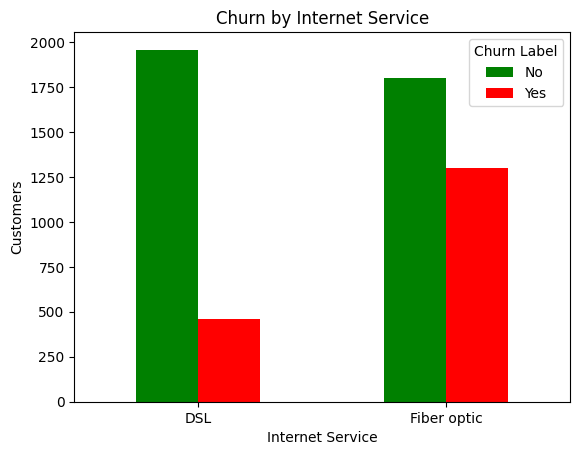

Churn Label         No   Yes
Internet Service            
DSL               1957   459
Fiber optic       1799  1297
Percentage of Churn by Fiber Optic customers: 42.70967741935484
Percentage of Churn by DSL customers: 11.277173913043478


In [11]:
churn_by_IS= pd.crosstab(df[df['Internet Service'] !='No']['Internet Service'],df['Churn Label'])
churn_by_IS.plot(kind='bar',stacked=False,color=['green','red'])
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.xticks(rotation=360)
plt.ylabel('Customers')
plt.show()
print(churn_by_IS)

fb=churn_by_IS.loc['Fiber optic','No']
churn_fb=churn_by_IS.loc['Fiber optic','Yes']
churn_fb=(churn_mtm/(churn_mtm+mtm))*100
print(f"Percentage of Churn by Fiber Optic customers: {churn_mtm}")

ds_churn=churn_by_IS.loc['DSL','Yes']
ds=churn_by_IS.loc['DSL','No']
ds_churn=(ds_churn/(ds_churn+ds))*100
print(f"Percentage of Churn by DSL customers: {oy_churn}")





As we can see that the signifcant amount of churn occurs in ther 1st two years but what the most important thing to see here is that the  about 12 % of all the churn occured in the 1st month alone

<Axes: xlabel='tenure Groups3'>

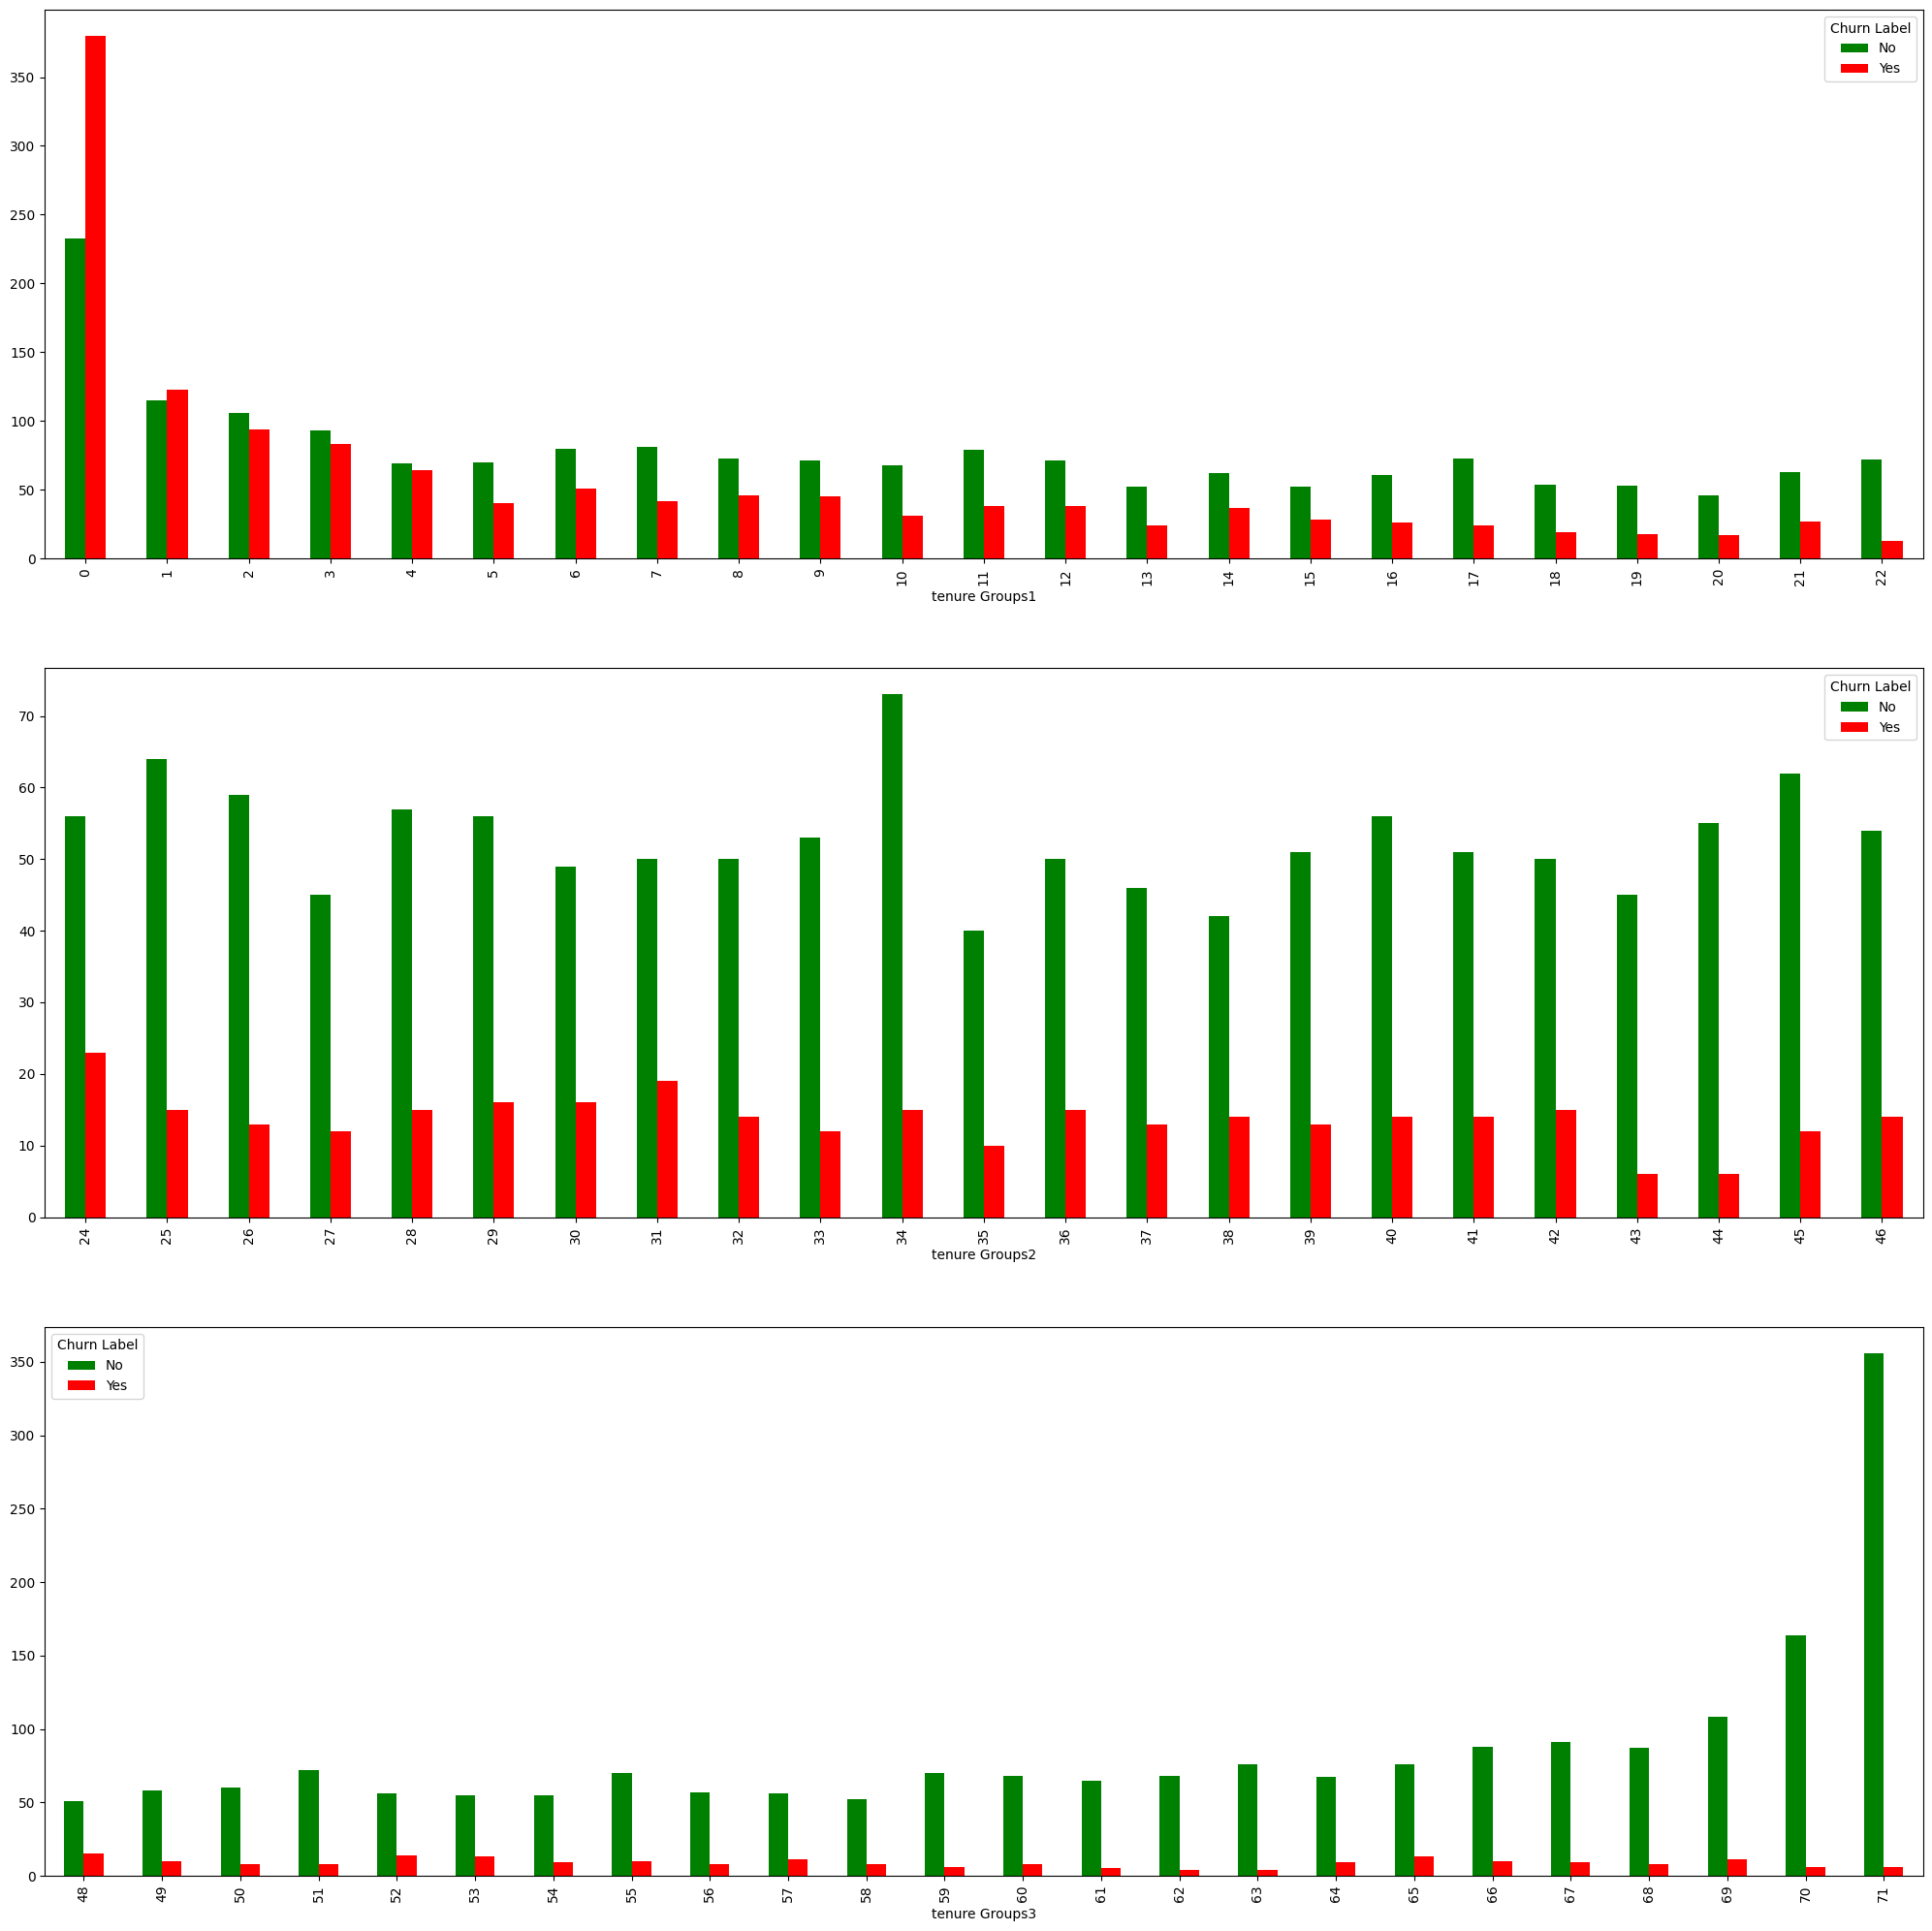

In [12]:
fig,axes= plt.subplots(3,1,figsize=(25,25))
df['tenure Groups1']=pd.cut(df['Tenure Months'],bins=range(0,24,1),labels=range(0,23,1))
df['tenure Groups2']=pd.cut(df['Tenure Months'],bins=range(24,48,1),labels=range(24,47,1))
df['tenure Groups3']=pd.cut(df['Tenure Months'],bins=range(48,74,1),labels=range(48,73,1))

churn_by_tenure=pd.crosstab(df['tenure Groups1'],df['Churn Label'])
churn_by_tenure.plot(kind='bar',stacked=False,color=['green','red'],ax=axes[0])
churn_by_tenure2=pd.crosstab(df['tenure Groups2'],df['Churn Label'])
churn_by_tenure2.plot(kind='bar',stacked=False,color=['green','red'],ax=axes[1])

churn_by_tenure3=pd.crosstab(df['tenure Groups3'],df['Churn Label'])
churn_by_tenure3.plot(kind='bar',stacked=False,color=['green','red'],ax=axes[2])

In [13]:
churn_by_1st_month=churn_by_tenure.iloc[0,0]
churn_by_1st_month= (churn_by_1st_month/df['Churn Label'].value_counts()[1])*100
print(f"Percentage of Churn by 1st month customers: {churn_by_1st_month}")

Percentage of Churn by 1st month customers: 12.466559657570892


<ipython-input-13-0e66a32c3bb2>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churn_by_1st_month= (churn_by_1st_month/df['Churn Label'].value_counts()[1])*100


The data Shows that the customers with the most churn , were one that opted for check as their patment method

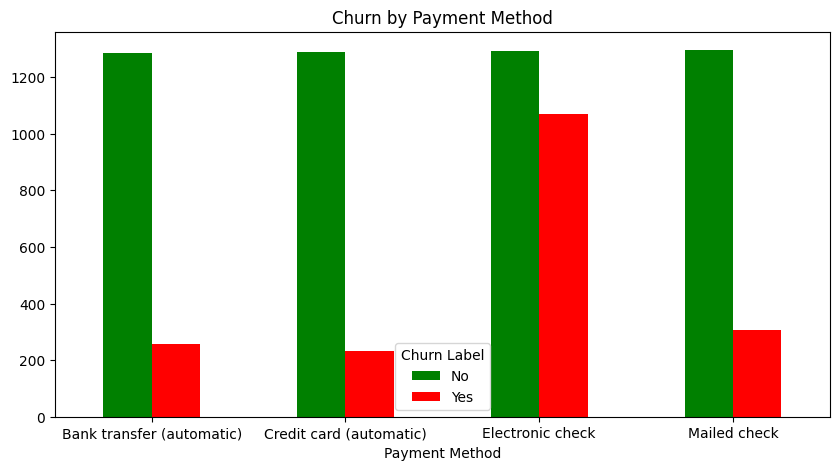

Churn Label                  No   Yes
Payment Method                       
Bank transfer (automatic)  1284   258
Credit card (automatic)    1289   232
Electronic check           1294  1071
Mailed check               1296   308
Percentage of Churn by customers who had Bank transfer (automatic): 16.731517509727624
Percentage of Churn by customers who had Credit card (automatic): 15.253122945430638
Percentage of Churn by customers who had Mailed check: 19.201995012468828
Percentage of Churn by customers who had Electronic check: 45.28541226215645


In [14]:
pd.crosstab(df['Payment Method'], df['Churn Label']).plot(kind='bar', color=['green', 'red'], figsize=(10, 5))
chrun_by_pm=pd.crosstab(df['Payment Method'], df['Churn Label'])
plt.title('Churn by Payment Method')
plt.xticks(rotation=360)
plt.show()
print(chrun_by_pm)

bt=chrun_by_pm.loc['Bank transfer (automatic)','No']
churn_bt=chrun_by_pm.loc['Bank transfer (automatic)','Yes']
churn_bt=(churn_bt/(churn_bt+bt))*100
print(f"Percentage of Churn by customers who had Bank transfer (automatic): {churn_bt}")

cc_churn=chrun_by_pm.loc['Credit card (automatic)','Yes']
cc=chrun_by_pm.loc['Credit card (automatic)','No']
cc_churn=(cc_churn/(cc_churn+cc))*100
print(f"Percentage of Churn by customers who had Credit card (automatic): {cc_churn}")

ma_churn=chrun_by_pm.loc['Mailed check','Yes']
ma=chrun_by_pm.loc['Mailed check','No']
ma_churn=(ma_churn/(ma_churn+ma))*100
print(f"Percentage of Churn by customers who had Mailed check: {ma_churn}")

ec_churn=chrun_by_pm.loc['Electronic check','Yes']
ec=chrun_by_pm.loc['Electronic check','No']
ec_churn=(ec_churn/(ec_churn+ec))*100
print(f"Percentage of Churn by customers who had Electronic check: {ec_churn}")

When we analyze the role of addtional services in churn reduction we can see that the a users that had additional services were showed less churning as compared to the ones tha had them
alos


--- Online Backup ---


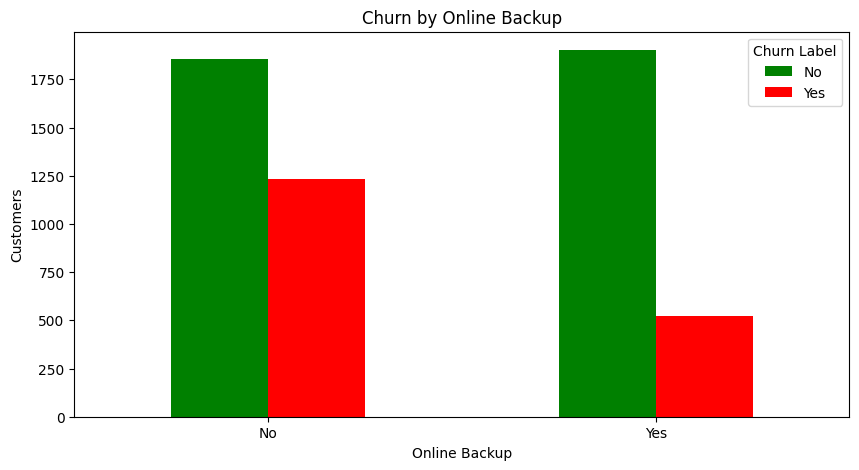

Churn Label      No   Yes
Online Backup            
No             1854  1233
Yes            1902   523
Percentage of Churn by customers who had Online Backup (Yes): 21.57%
Percentage of Churn by customers who had Online Backup (No): 39.94%

--- Device Protection ---


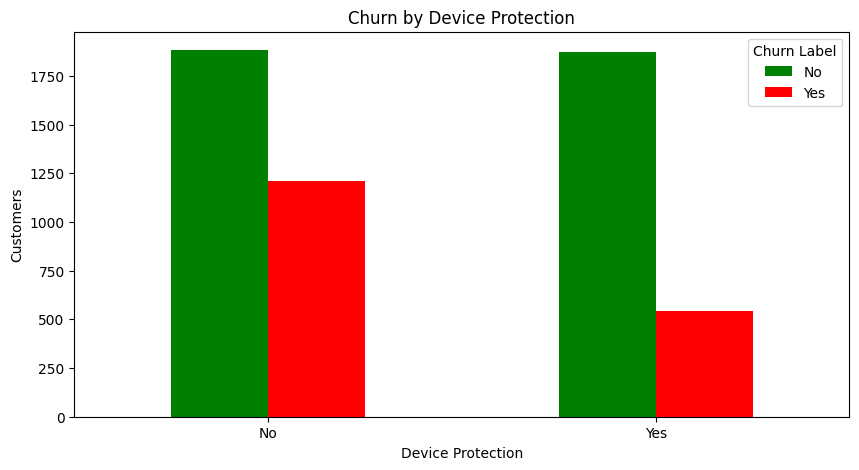

Churn Label          No   Yes
Device Protection            
No                 1883  1211
Yes                1873   545
Percentage of Churn by customers who had Device Protection (Yes): 22.54%
Percentage of Churn by customers who had Device Protection (No): 39.14%

--- Tech Support ---


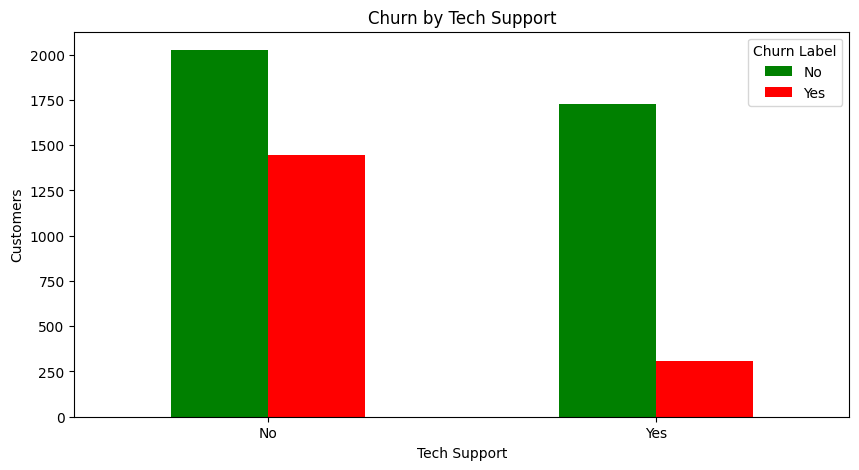

Churn Label     No   Yes
Tech Support            
No            2026  1446
Yes           1730   310
Percentage of Churn by customers who had Tech Support (Yes): 15.20%
Percentage of Churn by customers who had Tech Support (No): 41.65%

--- Streaming TV ---


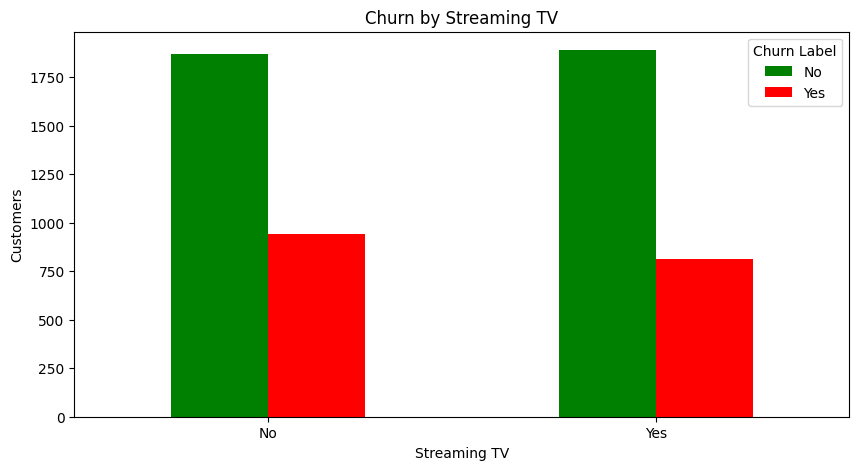

Churn Label     No  Yes
Streaming TV           
No            1867  942
Yes           1889  814
Percentage of Churn by customers who had Streaming TV (Yes): 30.11%
Percentage of Churn by customers who had Streaming TV (No): 33.54%

--- Streaming Movies ---


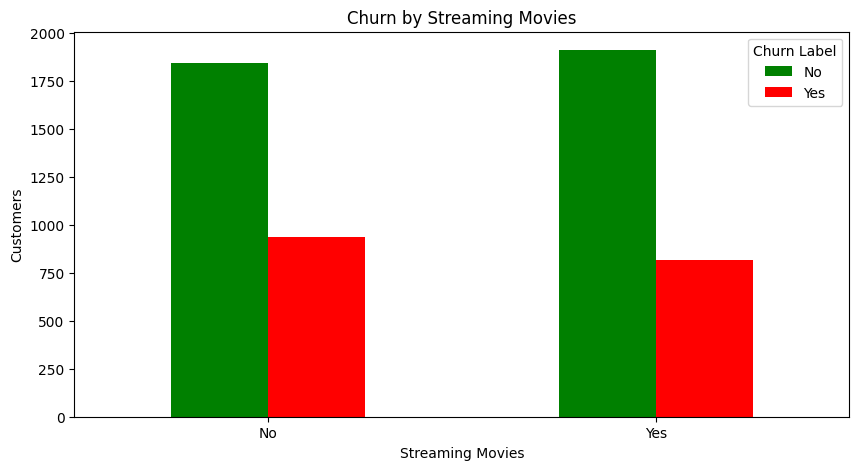

Churn Label         No  Yes
Streaming Movies           
No                1843  938
Yes               1913  818
Percentage of Churn by customers who had Streaming Movies (Yes): 29.95%
Percentage of Churn by customers who had Streaming Movies (No): 33.73%


In [15]:
service_features = [
    'Online Backup',
    'Device Protection',
    'Tech Support',
    'Streaming TV',
    'Streaming Movies'
]
for feature in service_features:
    print(f"\n--- {feature} ---")
    # Crosstab and plot
    churn_by_feature = pd.crosstab(df[df[feature]!='No internet service'][feature], df['Churn Label'])
    churn_by_feature.plot(kind='bar', color=['green', 'red'], figsize=(10, 5))
    plt.title(f'Churn by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Customers')
    plt.xticks(rotation=360)
    plt.show()
    print(churn_by_feature)

    # Yes category
    yes_count = churn_by_feature.loc['Yes', 'No']
    churn_yes_count = churn_by_feature.loc['Yes', 'Yes']
    churn_yes_pct = (churn_yes_count / (churn_yes_count + yes_count)) * 100
    print(f"Percentage of Churn by customers who had {feature} (Yes): {churn_yes_pct:.2f}%")

    # No category
    no_count = churn_by_feature.loc['No', 'No']
    churn_no_count = churn_by_feature.loc['No', 'Yes']
    churn_no_pct = (churn_no_count / (churn_no_count + no_count)) * 100
    print(f"Percentage of Churn by customers who had {feature} (No): {churn_no_pct:.2f}%")

Customers that opted for two or more than two additional servies showed less churing as compared to users with less or no services

                      Churn Reason  Counts
0            Competitor advantages     621
1  Lack of self-service on Website      88
2  Network and service limitations      88
3              Network reliability     103
4                   Pricing issues     199
5  Product/service dissatisfaction     191
6   Support/service quality issues     366


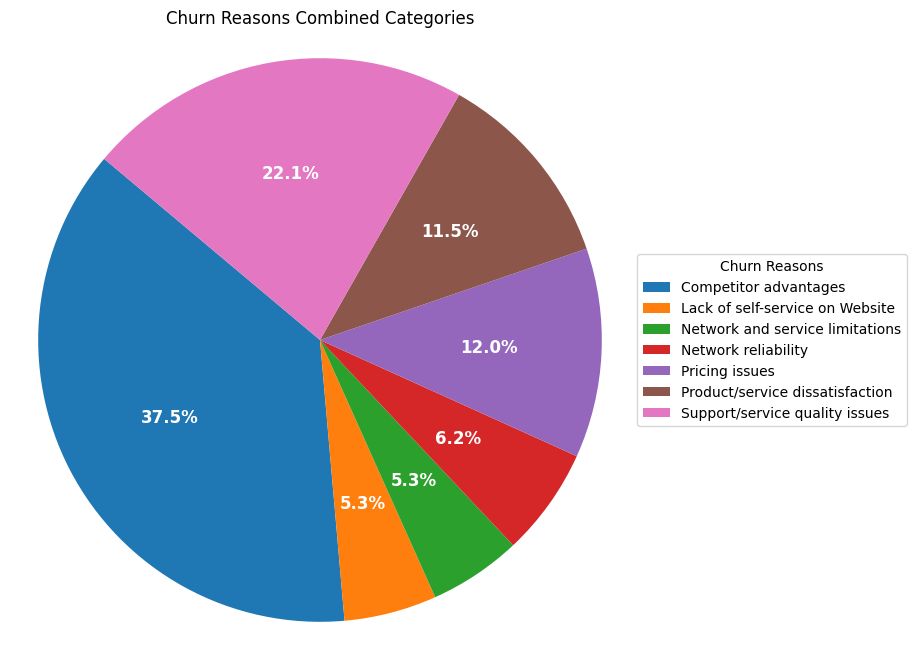

In [58]:
dfz.reset_index(drop=True,inplace=True)
dfz
combine_list1=['Competitor offered higher download speeds' ,'Competitor offered more data','Competitor made better offer','Competitor had better devices']
for rrr in combine_list1:
    dfz['Churn Reason'] = dfz['Churn Reason'].replace(rrr, 'Competitor advantages')

combine_list2=['Attitude of support person','Attitude of service provider','Poor expertise of phone support','Poor expertise of online support']
for rrr2 in combine_list2:
    dfz['Churn Reason'] = dfz['Churn Reason'].replace(rrr2, 'Support/service quality issues')

combine_list3=['Network reliability ','Lack of affordable download/upload speed','Limited range of services']
for rrr3 in combine_list3:
    dfz['Churn Reason'] = dfz['Churn Reason'].replace(rrr3, 'Network and service limitations')

combine_list4=['Product dissatisfaction','Service dissatisfaction']
for rrr4 in combine_list4:
    dfz['Churn Reason'] = dfz['Churn Reason'].replace(rrr4, 'Product/service dissatisfaction')

combine_list5=['Price too high','Extra data charges','Long distance charges']
for rrr5 in combine_list5:
    dfz['Churn Reason'] = dfz['Churn Reason'].replace(rrr5, 'Pricing issues')

drop_list= ["Don't know",'Moved', 'Deceased']

for ele in drop_list:
    dfz=dfz[dfz["Churn Reason"]!=ele]


df_combined = dfz.groupby('Churn Reason', as_index=False)['Counts'].sum()
print(df_combined)
sizes = df_combined['Counts']
labels = df_combined['Churn Reason']
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(
    sizes,
    autopct='%1.1f%%',
    startangle=140,
    textprops=dict(color="w")
)
ax.legend(wedges,labels,title="Churn Reasons",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1) )

plt.setp(autotexts, size=12, weight="bold")
plt.title('Churn Reasons Combined Categories')
plt.axis('equal')
plt.show()
